<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/machine-learning-bootcamp/unsupervised/02_dimensionality_reduction/03_pca_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Podział na zbiór treningowy i testowy](#2)
4. [Standaryzacja](#3)
5. [PCA](#4)




### <a name='0'></a> Import bibliotek

In [1]:
print("############################################################")
print("Etap9. Odcinek: PCA - Analiza Głównych Składowych - Wine dataset")

# Główne składowe są liniowymi kombinacjami zmiennych w zbiorze oryginalnym

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, edgeitems=5, linewidth=200)

############################################################
Etap9. Odcinek: PCA - Analiza Głównych Składowych - Wine dataset


### <a name='1'></a> Załadowanie danych

In [2]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()
# pierwsza zmienna jest targetem

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data = df.iloc[:, 1:]
target = df.iloc[:, 0]
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
target.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

### <a name='2'></a> Podział na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (133, 13)
X_test shape: (45, 13)


### <a name='3'></a> Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std[:5]

array([[-0.6341, -0.7472, -0.5602, -0.1194,  4.3397,  0.3676,  0.2708, -0.298 ,  2.7661, -1.0244,  0.914 ,  0.0473,  0.6943],
       [-0.9596, -1.0366, -2.1329, -0.7714,  3.5703, -0.6902, -0.7633, -1.7274,  1.4738, -0.9164,  1.4358,  0.6685, -0.0091],
       [ 0.5426,  1.2877, -0.8398, -0.1787, -0.6963,  0.2862,  0.6991, -0.695 , -0.216 , -0.2988, -0.1732,  0.5697,  1.009 ],
       [-1.961 , -1.4313,  0.4882,  0.4733, -0.8362,  0.335 , -0.0008,  0.4962, -0.2823, -0.817 ,  0.6531, -0.4044, -0.9211],
       [-0.6967,  1.8051,  1.2921,  2.1033,  0.143 , -0.1206,  0.1246,  0.5756,  0.165 , -1.2489, -0.1297,  0.7391, -1.1427]])

### <a name='4'></a> PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
# tu też trenuje tylko na treningowych żeby uniknąć wycieku informacji ze zbioru testowego
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca.shape

(133, 3)

Wyjaśniona wariancja

In [8]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

# przy trzech komponentach ponad 65% wyjaśnionej wariancji

,explained_variance_ratio,cumulative,component
0,0.360793,0.360793,1
1,0.193516,0.554309,2
2,0.104747,0.659057,3


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

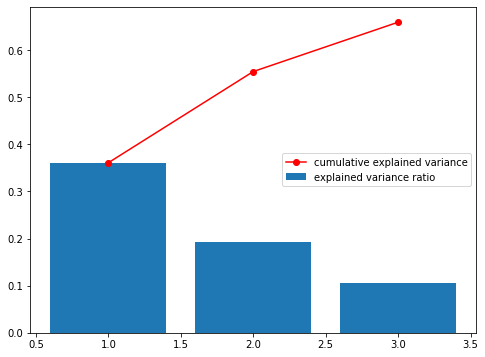

In [10]:
# sam robię w matplotlib bo na github nie widać plotly
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8.0,6.0))
ax = fig.add_subplot(111)
ax.bar(results['component'], results['explained_variance_ratio'],
label='explained variance ratio')
ax.plot(results['component'], results['cumulative'], marker='o', label='cumulative explained variance', c="red")
plt.legend(loc='center right')
plt.show()

In [11]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca1', 'pca2', 'pca3', 'target'])
X_train_pca_df.head()

,pca1,pca2,pca3,target
0,2.477991,-0.159848,-0.267393,2.0
1,2.013159,1.398463,1.738401,2.0
2,0.778033,-0.302686,0.459449,1.0
3,-0.402874,2.243350,-0.995855,2.0
4,-1.179141,0.585718,-3.054051,2.0


In [17]:
px.scatter_3d(X_train_pca_df, x='pca1', y='pca2', z='pca3', color='target', template='plotly_dark', width=900)

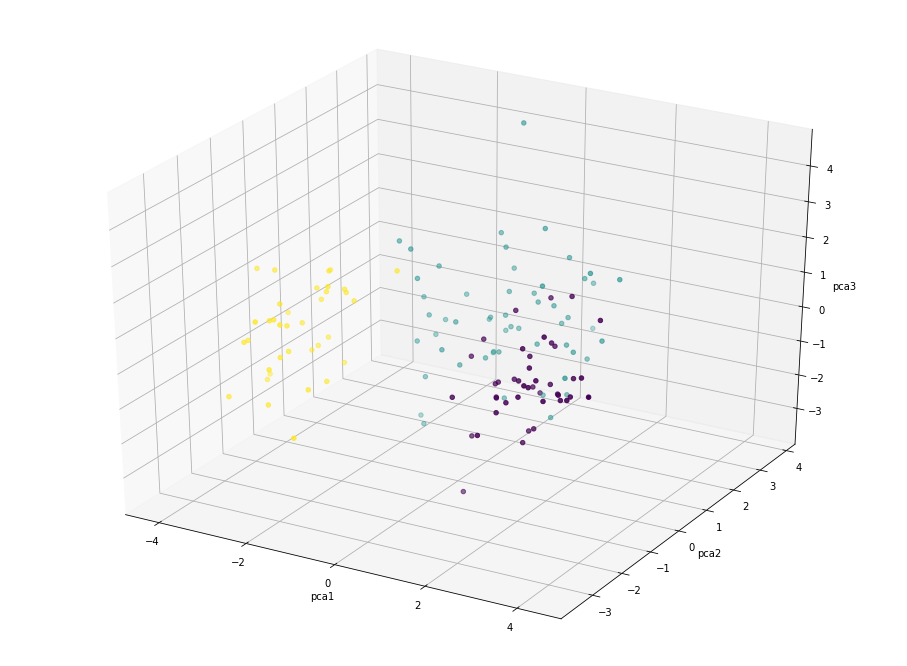

In [18]:
# sam robię w matplotlib bo na github nie widać plotly
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16.0,12.0))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca_df['pca1'], X_train_pca_df['pca2'], X_train_pca_df['pca3'], c=X_train_pca_df['target'])
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

In [19]:
X_train_pca[:5]

array([[ 2.478 , -0.1598, -0.2674],
       [ 2.0132,  1.3985,  1.7384],
       [ 0.778 , -0.3027,  0.4594],
       [-0.4029,  2.2434, -0.9959],
       [-1.1791,  0.5857, -3.0541]])

In [20]:
X_test_pca[:5]

array([[-2.8955, -1.188 ,  1.3108],
       [-2.4319, -2.1585,  0.9318],
       [-0.3891,  2.1724,  0.0419],
       [ 2.6019, -0.1297,  0.0984],
       [-1.045 ,  1.7518, -1.0054]])